# Análisis general - Location
En esta sección se realiza un análisis de las columnas vinculadas a la localización del tweet (location, located, location_length).

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re

In [10]:
# Replico la estructura de los tweets.
tweets = spotify_songs = pd.read_csv('Data/train.csv')
tweets['length'] = tweets['text'].str.len()
tweets['located'] = tweets['location'].notnull().astype(int)
tweets['location_length'] = tweets['location'].str.len()
tweets['location_length'].fillna(0, inplace=True)
tweets['has_keyword'] = tweets['keyword'].notnull().astype(int)
tweets['keyword_length'] = tweets['keyword'].str.len()
tweets['keyword_length'].fillna(0, inplace=True)
tweets['tweet_length'] = tweets['length'] + tweets['location_length'] + tweets['keyword_length']
tweets.head()

,id,keyword,location,text,target,length,located,location_length,has_keyword,keyword_length,tweet_length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,0,0.0,0,0.0,69.0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,0,0.0,0,0.0,38.0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,0,0.0,0,0.0,133.0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,0,0.0,0,0.0,65.0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,0,0.0,0,0.0,88.0


In [15]:
location_tweets = tweets[tweets['located'] == 1]
location_tweets.head()

,id,keyword,location,text,target,length,located,location_length,has_keyword,keyword_length,tweet_length
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,55,1,10.0,1,6.0,71.0
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,67,1,29.0,1,6.0,102.0
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,82,1,6.0,1,6.0,94.0
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,34,1,16.0,1,6.0,56.0
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,76,1,10.0,1,6.0,92.0


## Describe

In [12]:
location_tweets.describe()

,id,target,length,located,location_length,has_keyword,keyword_length,tweet_length
count,5080.000000,5080.000000,5080.000000,5080.0,5080.000000,5080.0,5080.000000,5080.000000
mean,5407.112598,0.432283,102.319882,1.0,13.645669,1.0,8.770866,124.736417
std,3116.359041,0.495442,33.405894,0.0,7.072825,0.0,3.500100,34.853063
min,48.000000,0.000000,8.000000,1.0,1.000000,1.0,4.000000,22.000000
25%,2728.750000,0.000000,79.000000,1.0,8.000000,1.0,6.000000,101.000000
50%,5360.500000,0.000000,109.000000,1.0,13.000000,1.0,8.000000,131.000000
75%,8086.000000,1.000000,134.000000,1.0,18.000000,1.0,10.000000,154.000000
max,10833.000000,1.000000,152.000000,1.0,49.000000,1.0,21.000000,193.000000


Al filtrar los tweets que no tienen location, nos quedaron 5080 registros que era el valor esperado.\
La columna located queda con todos 1, por eso los valores de sus variables numéricas asociadas, mientras que la longitud de localización de los tweets aumentó su media de 9 caracteres a más de 13 aproximadamente.\
El valor medio del target aumentó de 0,427569 a 0,432283 al realizar este filtro, por lo que impacta positivamente sobre esta columna.\
La columna length también aumentó su valor medio de 101 caracteres a 102 aproximadamente.\
La columna has_keyword tiene todos sus valores en 1 por lo que podemos afirmar que si un tweet tiene localización también cuenta con palabras claves. Esto también implica un aumento en la media de la longitud de las palabras claves y también un aumento bastante marcado en la longitud total de los tweets.

## Localizaciones más utilizadas
A continuación se realiza una lista con las 30 localizaciones más utilizadas:

In [18]:
locations = location_tweets['location'].value_counts().to_frame().reset_index()
locations.columns = ['location', 'count']
locations.head(60)

,location,count
0,USA,104
1,New York,71
2,United States,50
3,London,45
4,Canada,29
5,Nigeria,28
6,UK,27
7,"Los Angeles, CA",26
8,India,24
9,Mumbai,22


La mayoría de las palabras de la lista pertenecen a lugares ubicados en Estados Unidos de América.\
Algunas localizaciones no pertenecen a ningún lugar del mundo, como por ejemplo: worldwide, earth, ss, 304 o ??????.

## Localizaciones menos utilizadas
Lista de las 60 localizaciones menos utilizadas:

In [19]:
locations.tail(60)

,location,count
3281,Fakefams,1
3282,"Bishops Stortford, England",1
3283,New Delhi,1
3284,Ivano-Frankivsk,1
3285,BrowardCounty // Florida,1
3286,"Oneonta, NY/ Staten Island, NY",1
3287,taking bath do not disturb,1
3288,Virgo Supercluster,1
3289,"Oslo, Norway",1
3290,"Sylacauga, Alabama",1


La cantidad de localizaciones que no refieren a un lugar geográfico aumenta considerablemente respecto de la lista de localizaciones más utilizadas.

## WordCloud con las localizaciones
Al igual que para las palabras claves, se realiza un WordCloud de palabras para las localizaciones:

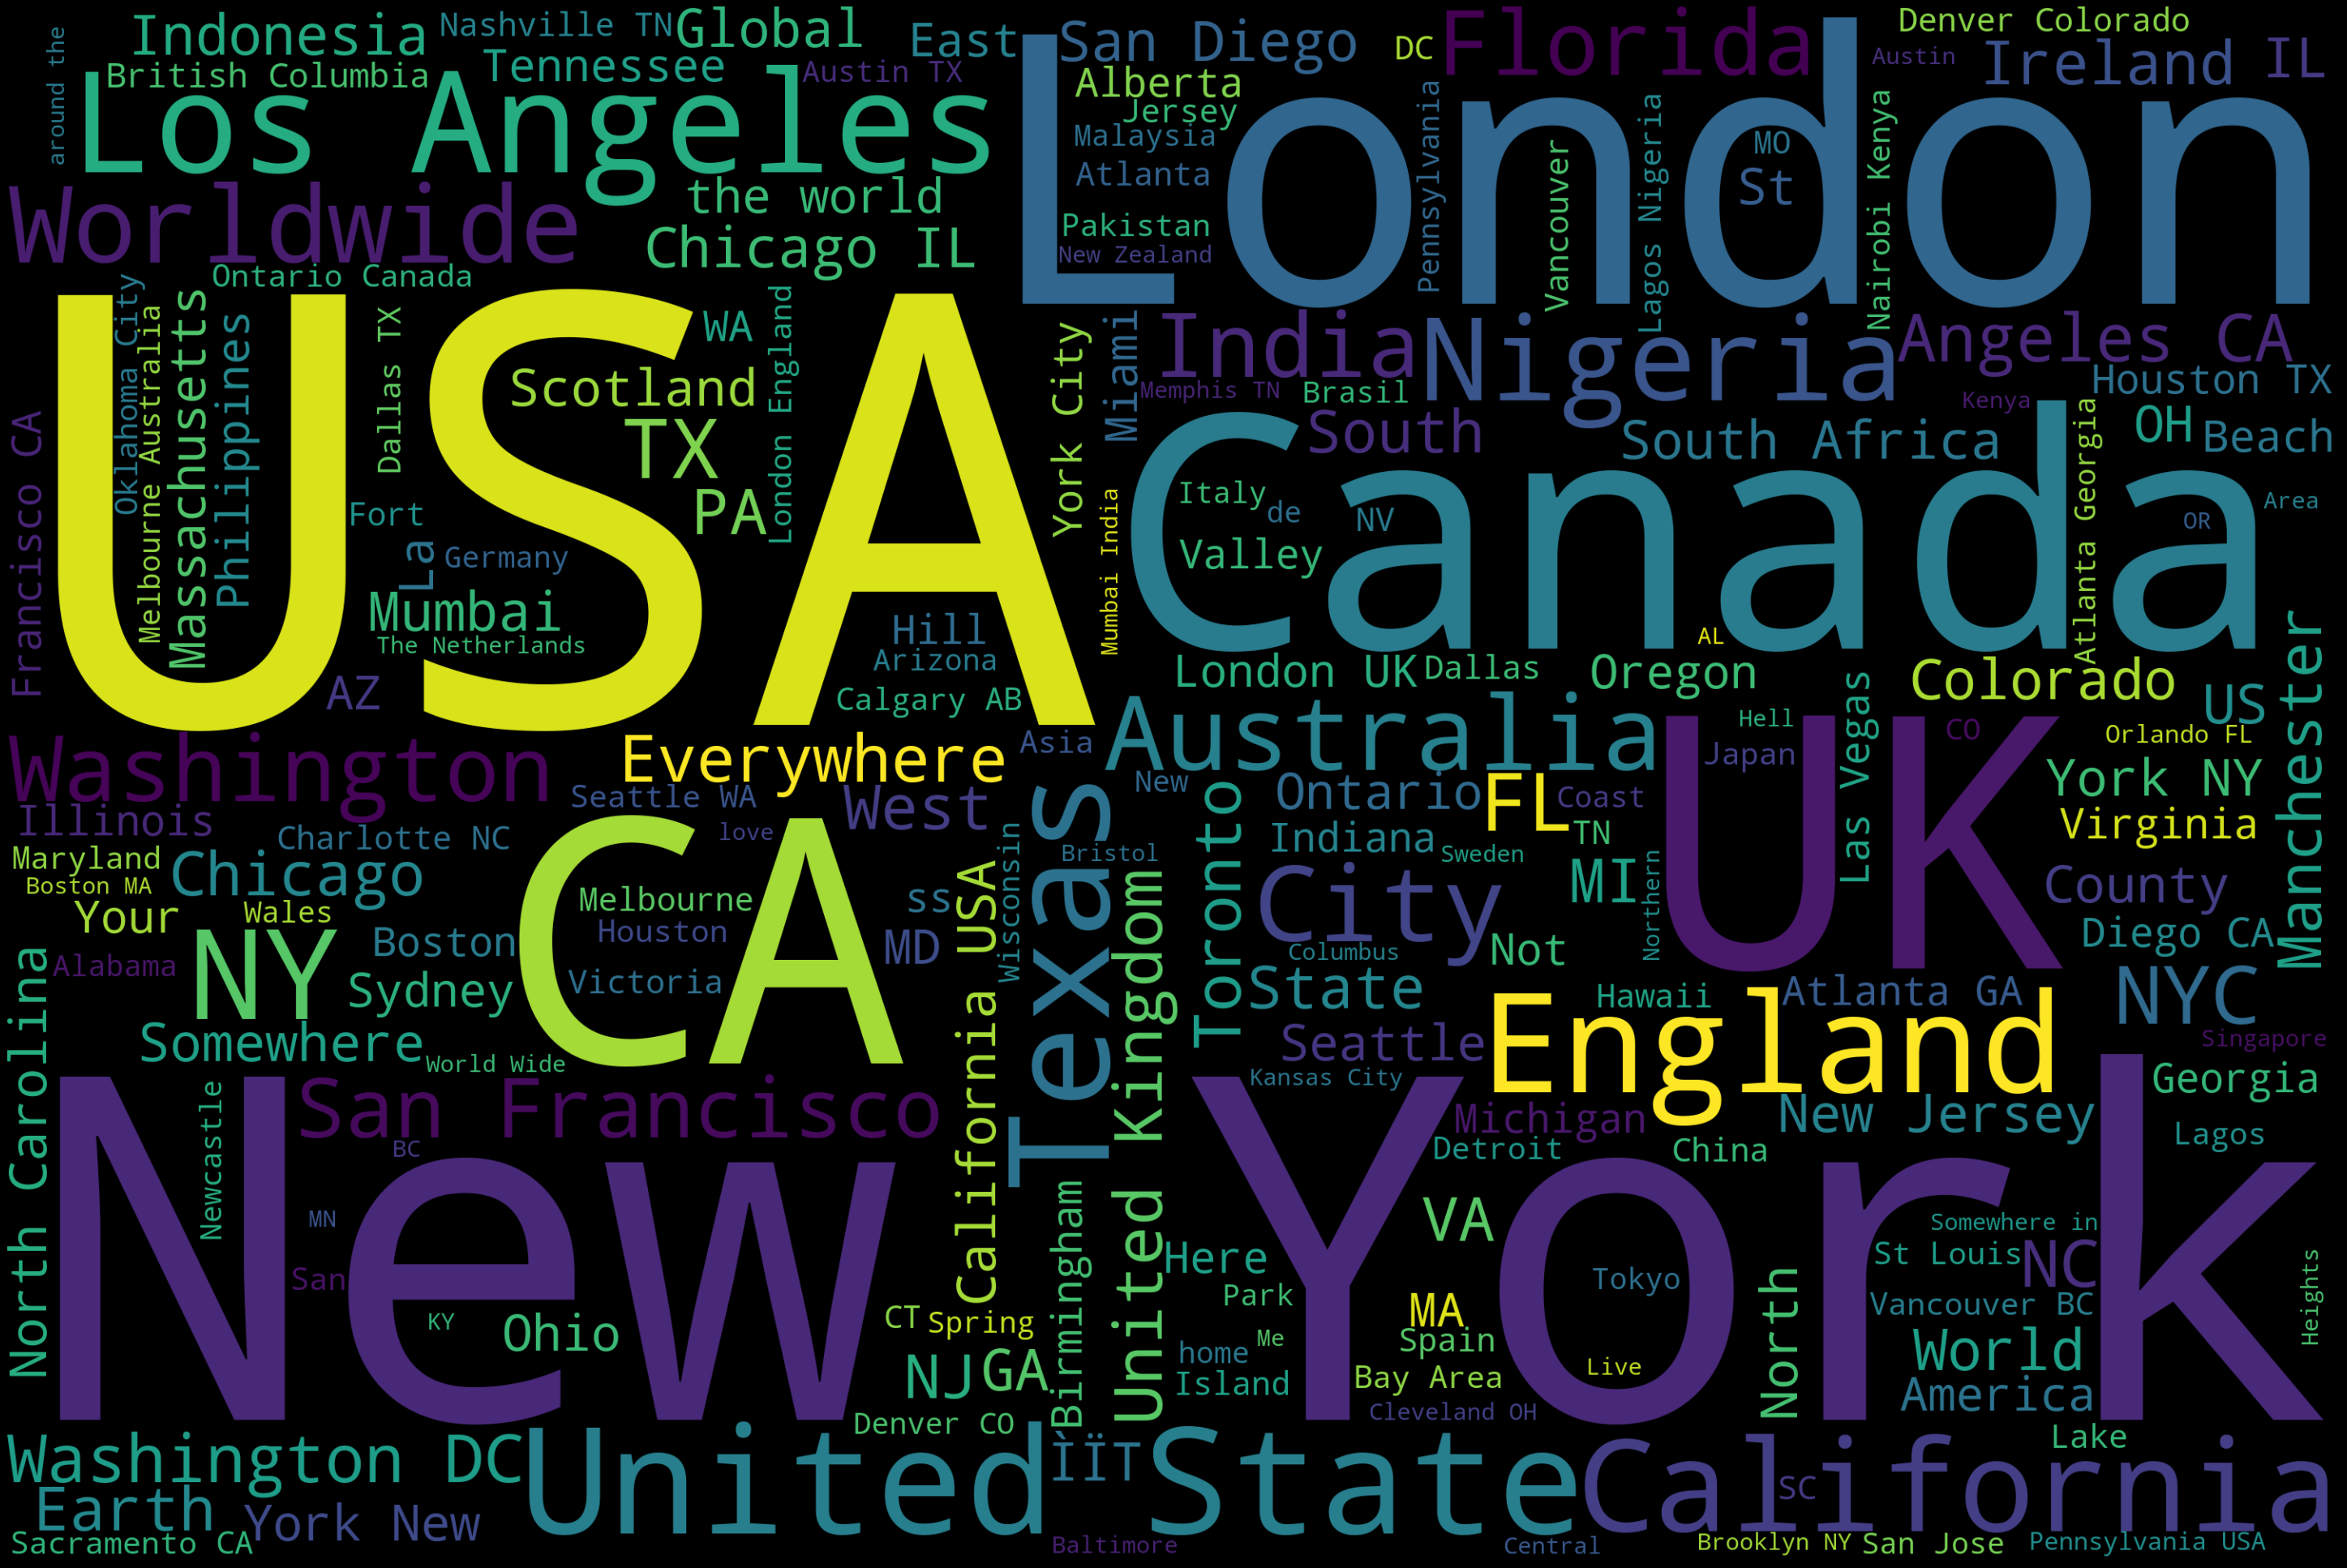

In [21]:
text = " ".join(word for word in location_tweets['location'])
wordcloud = WordCloud(width = 3000, height = 2000, background_color = 'black').generate(str(text))
fig = plt.figure(figsize = (40, 30), facecolor = 'k', edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Location con caracteres especiales
Existen muchas localizaciones que no referencian a ningún lugar geográfico, muchas de las cuales tienen en su texto caracteres especiales.\
A continuación se filtran aquellas localizaciones que contienen caracteres especiales:

In [37]:
characters_to_filter = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '?', '/', ':', '-', '*', 'ˆ', '!', '@', '#', '$', '%', '&', '(', ')', '{', '}', '[', ']', '\'']
pat = '|'.join(['({})'.format(re.escape(c)) for c in characters_to_filter])
filtered_locations = location_tweets[~location_tweets['location'].str.contains(pat)]
filtered_locations.count()

/Users/gastonmontes/opt/anaconda3/lib/python3.7/site-packages/pandas/core/strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


id                 4292
keyword            4292
location           4292
text               4292
target             4292
length             4292
located            4292
location_length    4292
has_keyword        4292
keyword_length     4292
tweet_length       4292
dtype: int64

### Describe
Se realiza un describe sobre el dataset con los tweets cuyas localizaciones no contienen caracteres especiales:

In [38]:
filtered_locations.describe()

,id,target,length,located,location_length,has_keyword,keyword_length,tweet_length
count,4292.000000,4292.000000,4292.000000,4292.0,4292.000000,4292.0,4292.000000,4292.000000
mean,5400.177074,0.443150,103.440820,1.0,12.723206,1.0,8.830149,124.994175
std,3099.470847,0.496815,32.785981,0.0,6.386436,0.0,3.554522,34.084357
min,48.000000,0.000000,8.000000,1.0,2.000000,1.0,4.000000,22.000000
25%,2729.750000,0.000000,80.000000,1.0,8.000000,1.0,7.000000,101.000000
50%,5381.500000,0.000000,110.000000,1.0,12.000000,1.0,8.000000,131.000000
75%,8038.250000,1.000000,135.000000,1.0,16.000000,1.0,10.000000,153.000000
max,10833.000000,1.000000,152.000000,1.0,43.000000,1.0,21.000000,189.000000


Comparando con los describe anteriores del dataset sin filtro y del dataset con solo los registros que contienen localización:\
El valor medio del target: 0.42966 -> 0.432283 -> 0.443150, el valor medio del target aumentó con respecto a los anteriores datasets.\
Valor medio de la longitud del texto del tweet: 101.037436 -> 102.319882 -> 103,440820, el valor medio de la longitud del texto aumentó.\
En cuanto al valor medio de la longitud de las palabras claves:  8.667148 -> 8.770866 -> 8.830149, también aumenta.\
El valor medio de la longitud total del tweet aumenta: 118.810062 -> 124.736417 -> 124.994175.

### Localizaciones más utilizadas
Nueva lista de las 60 localizaciones más utilizadas:

In [41]:
locations = filtered_locations['location'].value_counts().to_frame().reset_index()
locations.columns = ['location', 'count']
locations.head(60)

,location,count
0,USA,104
1,New York,71
2,United States,50
3,London,45
4,Canada,29
5,Nigeria,28
6,UK,27
7,"Los Angeles, CA",26
8,India,24
9,Mumbai,22


La lista de localizaciones quedó muy similar pero sin algunos valores que fueron depurados como 304 o ??????.

### Localizaciones menos utilizadas
Nueva lista de las 60 localizaciones menos utilizadas:

In [42]:
locations.tail(60)

,location,count
2571,"Charleston, IL",1
2572,Santiago de Cmpostela Galicia,1
2573,English Midlands,1
2574,"Fort Worth, Texas",1
2575,PanamÌÁ,1
2576,Johannesburg,1
2577,"The Kingdom of Fife, Scotland",1
2578,Dakar,1
2579,ELVY,1
2580,"Overland Park, KS",1


En esta nueva lista vemos que la mayoría de los valores que no correspondían a localizaciones reales fueron depurados.

### WordCloud
Se realiza un nuevo WordCloud con las localizaciones sin caracteres especiales:

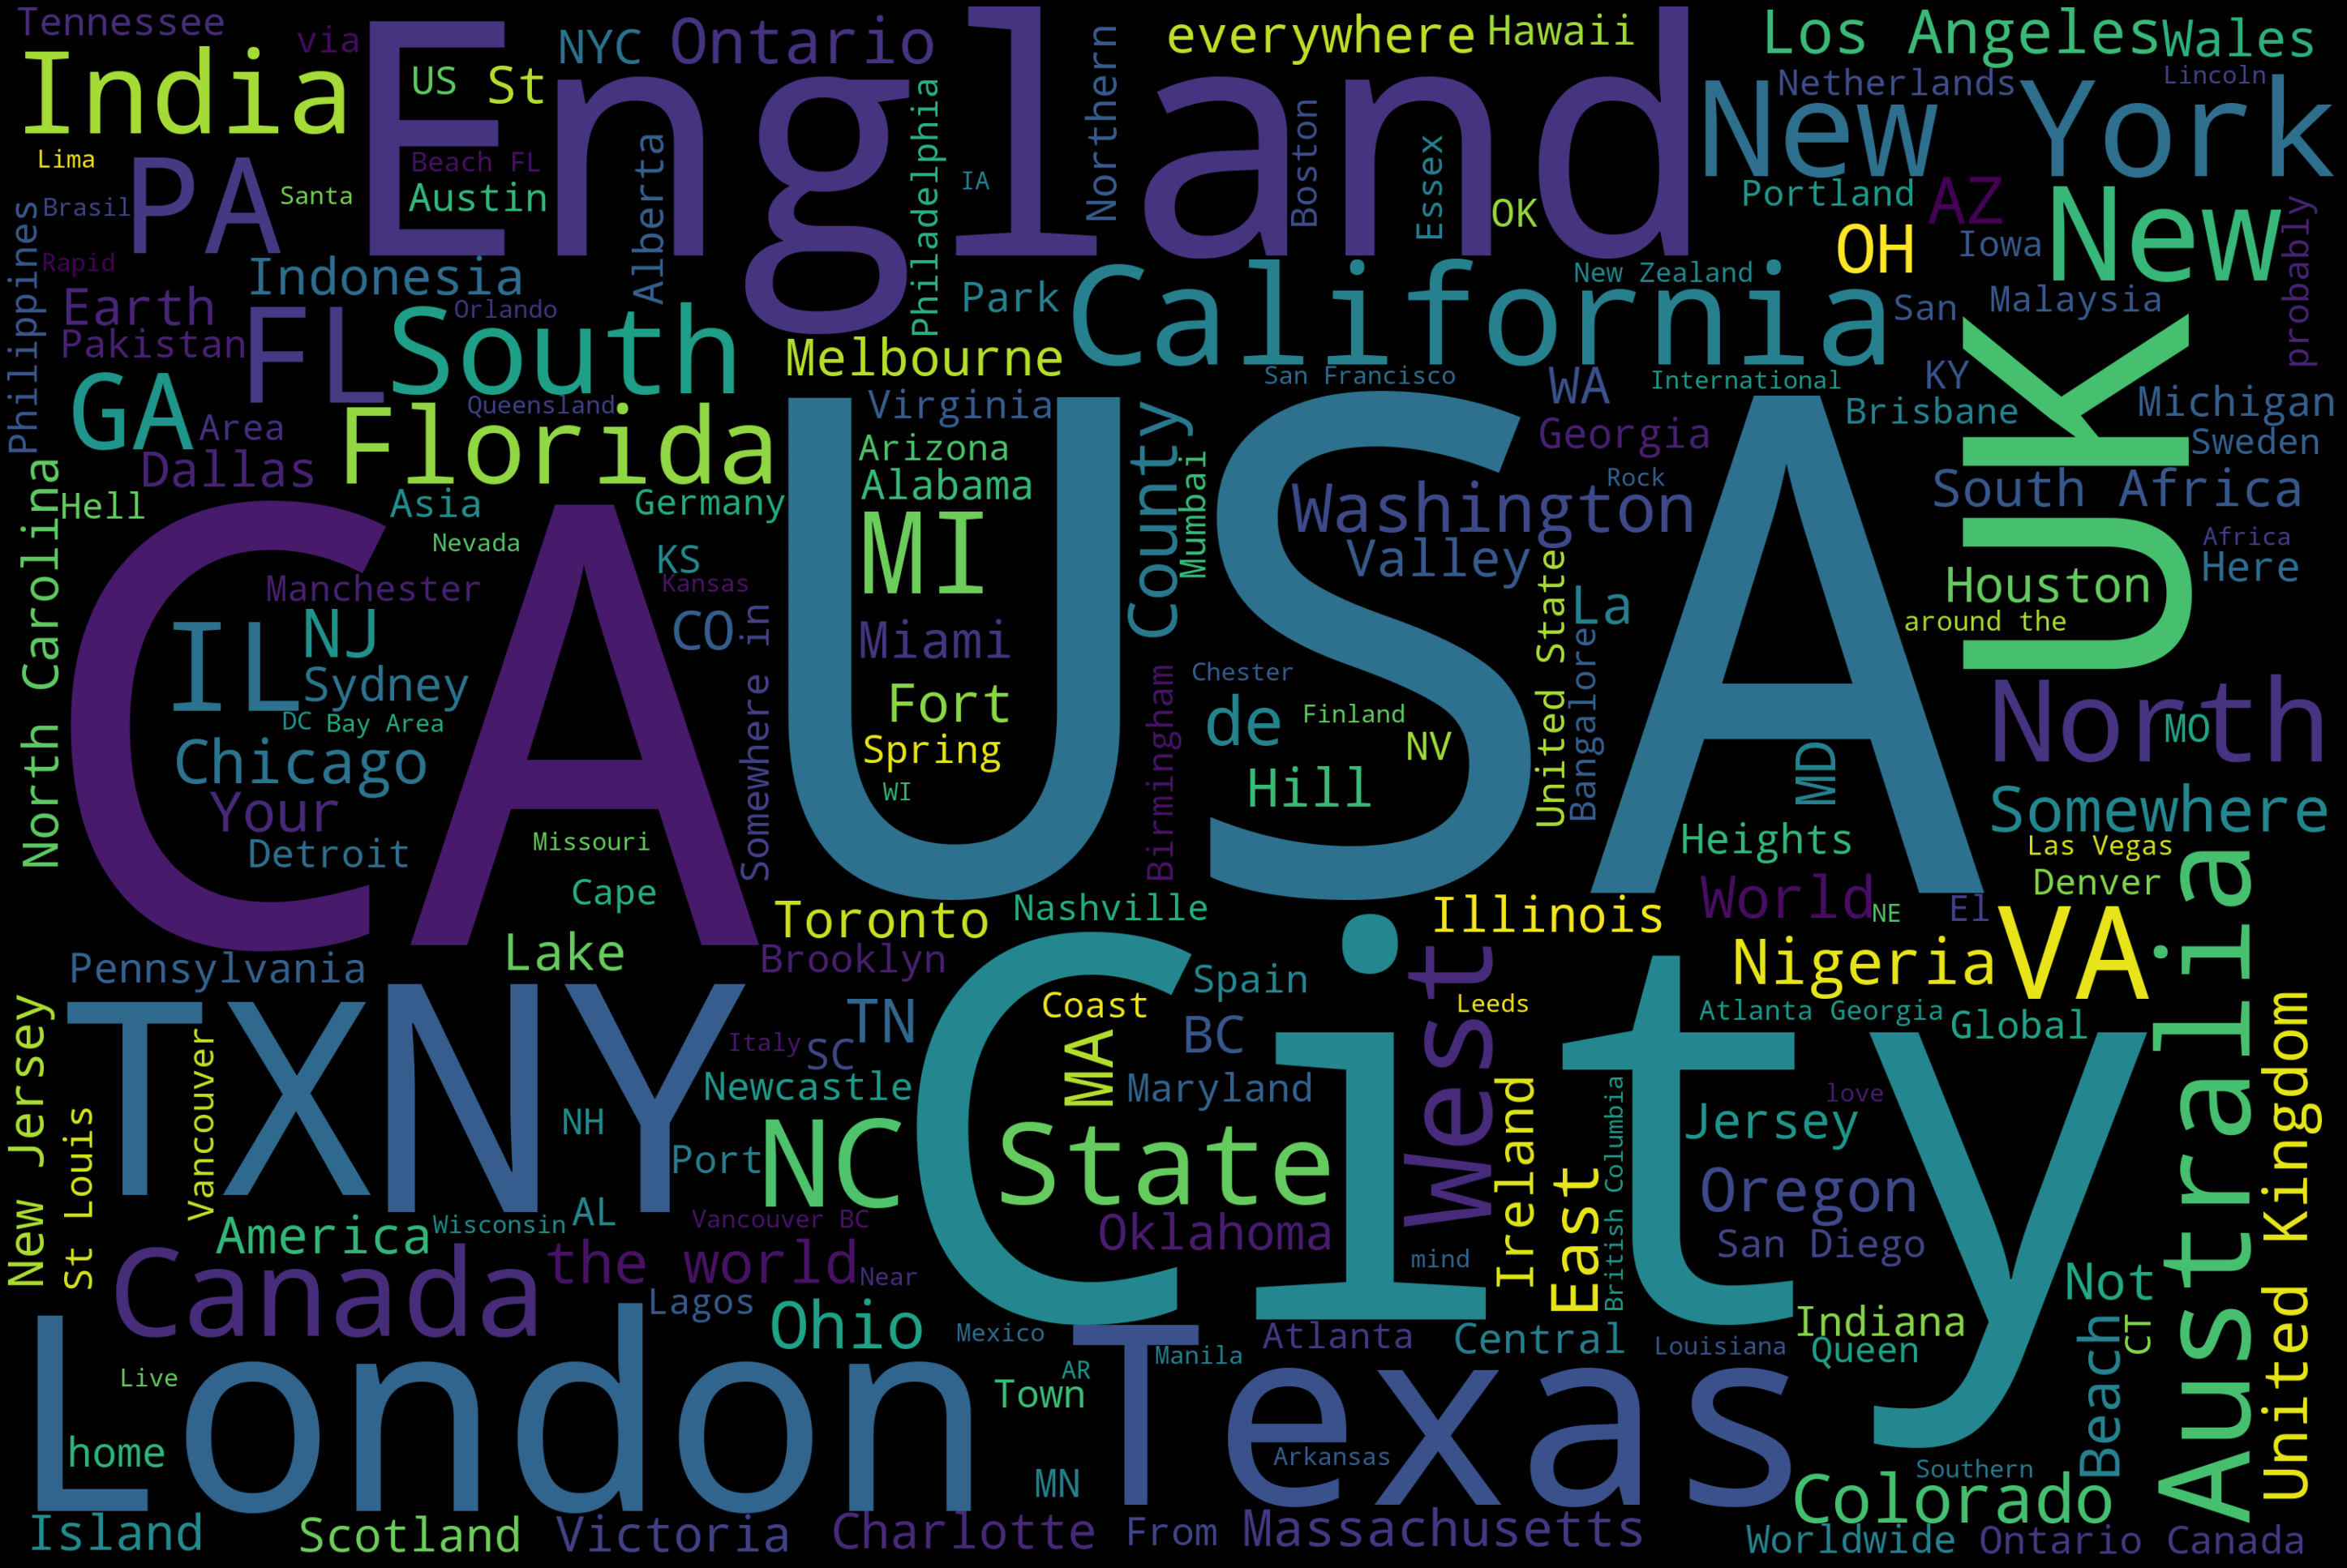

In [43]:
text = " ".join(word for word in locations['location'])
wordcloud = WordCloud(width = 3000, height = 2000, background_color = 'black').generate(str(text))
fig = plt.figure(figsize = (40, 30), facecolor = 'k', edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()